In [108]:
import numpy as np
import pandas as pd
from keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
import cv2
import matplotlib.pyplot as plt

In [109]:
dat = pd.read_csv("../data_sets/mnist_train_small.csv").values

In [110]:
X = dat[:,2:]
y= dat[:,1]

In [111]:
ohe=OneHotEncoder(categories="auto")


In [112]:
y[:10]

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3], dtype=int64)

In [113]:
y_hot=ohe.fit_transform(y.reshape(-1,1)) .todense()

In [134]:
print(y_hot[:10])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [115]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [116]:
layer1=Dense(100,activation="tanh",input_shape=([X.shape[1]]))
layer2=Dense(100,activation="tanh")
layer3=Dense(y_hot.shape[1],activation="softmax")

In [117]:
model=Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x000001F681228B00>>

In [118]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [119]:
model.fit(X_train,y_train,epochs=100,batch_size=200)

Epoch 1/100
5360/5360 [==============================] - 0s 78us/step - loss: 1.5340 - acc: 0.5220
Epoch 2/100
5360/5360 [==============================] - 0s 30us/step - loss: 0.7904 - acc: 0.7851
Epoch 3/100
5360/5360 [==============================] - 0s 29us/step - loss: 0.5878 - acc: 0.8257
Epoch 4/100
5360/5360 [==============================] - 0s 33us/step - loss: 0.5087 - acc: 0.8528
Epoch 5/100
5360/5360 [==============================] - 0s 31us/step - loss: 0.4343 - acc: 0.8744
Epoch 6/100
5360/5360 [==============================] - 0s 39us/step - loss: 0.4117 - acc: 0.8802
Epoch 7/100
5360/5360 [==============================] - 0s 31us/step - loss: 0.4006 - acc: 0.8791
Epoch 8/100
5360/5360 [==============================] - 0s 30us/step - loss: 0.3771 - acc: 0.8862
Epoch 9/100
5360/5360 [==============================] - 0s 36us/step - loss: 0.3355 - acc: 0.8978
Epoch 10/100
5360/5360 [==============================] - 0s 47us/step - loss: 0.3290 - acc: 0.8987
Epoch 11/

In [120]:
model.evaluate(X_test,y_test)

2640/2640 [==============================] - 0s 61us/step


[0.2884362551750559, 0.9136363636363637]

In [173]:
one=cv2.imread("two.jpeg")
gray=cv2.cvtColor(one,cv2.COLOR_BGR2GRAY)
small=cv2.resize(gray,(28,28))
small = (small < 100).astype(int) * 255


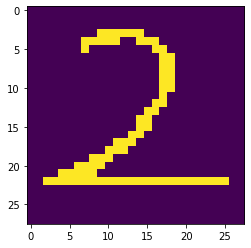

In [174]:
plt.imshow(small)

In [175]:
np.argmax(model.predict(np.array([small.flatten()]))) #our predictiion through mlp

2